#### Linear regression with raw data; features [‘age’, ‘children’, …] 

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression; 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head(), insurance.columns

(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object'))

In [3]:
X = insurance.drop(['sex','bmi', 'smoker', 'region', 'charges'],axis=1)
y = insurance['charges']
X, y

(      age  children
 0      19         0
 1      18         1
 2      28         3
 3      33         0
 4      32         0
 ...   ...       ...
 1333   50         3
 1334   18         0
 1335   18         0
 1336   21         0
 1337   61         0
 
 [1338 rows x 2 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [5]:
def metricScore(y_test, y_hat):
    print('R2 score is : ', r2_score(y_test, y_hat))
    print('Mean Squred Error  score is : ', mean_squared_error(y_test, y_hat))

In [6]:
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.04225304958507703
Mean Squred Error  score is :  141012174.4510918


#### Pandas get.dummies()

In [7]:
X = insurance.drop(['charges'],axis=1)
y = insurance['charges']
X = pd.get_dummies(X, drop_first=True)
X.head()

age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0     False        True             False   
1   18  33.770         1      True       False             False   
2   28  33.000         3      True       False             False   
3   33  22.705         0      True       False              True   
4   32  28.880         0      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [9]:
lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.7807756903022633
Mean Squred Error  score is :  32277102.620504204


### Introduction of OneHotEncoding

In [10]:
X = insurance.drop(['charges'],axis=1)
y = insurance['charges']

encoder = LabelEncoder()

X['sex'] = encoder.fit_transform(X['sex'])
X['smoker'] = encoder.fit_transform(X['smoker'])

In [11]:
X.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
new_cols = pd.get_dummies(X['region'])
X.drop(columns='region', axis=1, inplace=True)

In [13]:
X = pd.concat([X, new_cols], axis=1)
X.head()

age  sex     bmi  children  smoker  northeast  northwest  southeast  \
0   19    0  27.900         0       1      False      False      False   
1   18    1  33.770         1       0      False      False       True   
2   28    1  33.000         3       0      False      False       True   
3   33    1  22.705         0       0      False       True      False   
4   32    1  28.880         0       0      False       True      False   

   southwest  
0       True  
1      False  
2      False  
3      False  
4      False

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.7807756903022633
Mean Squred Error  score is :  32277102.620504208


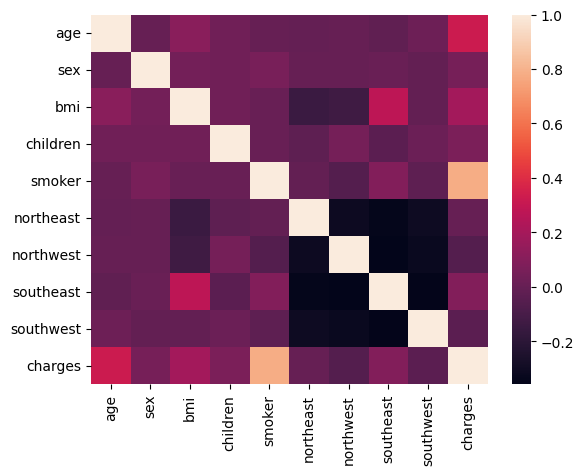

In [15]:
sns.heatmap(pd.concat([X_train,y_train],axis=1).corr())
plt.show()

### Introduction of new feature bmi categories

In [16]:
def bmi_category(bmi):
    transformed_list = []

    for index in bmi:
        if index < 18.5:
            transformed_list.append(1)
        elif index >= 18.5 and index <= 24.5:
            transformed_list.append(2)
        elif index >= 25 and index <= 29.5:
            transformed_list.append(3)
        else:
            transformed_list.append(4)

    return transformed_list

X['bmi'] = bmi_category(X.bmi.values)
X.tail()

age  sex  bmi  children  smoker  northeast  northwest  southeast  \
1333   50    1    4         3       0      False       True      False   
1334   18    0    4         0       0       True      False      False   
1335   18    0    4         0       0      False      False       True   
1336   21    0    3         0       0      False      False      False   
1337   61    0    3         0       1      False       True      False   

      southwest  
1333      False  
1334      False  
1335      False  
1336       True  
1337      False

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.7742644682532225
Mean Squred Error  score is :  33235770.85648383


#### Introduction of new feature life stage categories

In [18]:
def age_categories(ages):
    transformed_list = []

    for age in ages:
        if age <= 30:
            transformed_list.append(1)
        elif age < 60:
            transformed_list.append(2)
        else:
            transformed_list.append(3)

    return transformed_list

X['life_stage'] = age_categories(X.age.values)
X.head()                

age  sex  bmi  children  smoker  northeast  northwest  southeast  \
0   19    0    3         0       1      False      False      False   
1   18    1    4         1       0      False      False       True   
2   28    1    4         3       0      False      False       True   
3   33    1    2         0       0      False       True      False   
4   32    1    3         0       0      False       True      False   

   southwest  life_stage  
0       True           1  
1      False           1  
2      False           1  
3      False           2  
4      False           2

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.7744913606954102
Mean Squred Error  score is :  33202364.749969427
 0.7744913606954102
Mean Squred Error  score is :  33202364.749969427


#### Introduction of new feature Risk factor

In [20]:
def calculate_risk(life_stage, smoker, bmi):
    transformed_list = []
    counter = 0 

    if len(life_stage) == len(smoker):
        for stage, smoke in zip(life_stage, smoker):
            if (stage == 1) and (smoke == 1) and (bmi[counter] == 2):
                transformed_list.append(1)        
            elif (stage == 1) and (smoke == 1) and (bmi[counter] == 3):
                transformed_list.append(2)
            elif (stage == 2) and (smoke == 1) and (bmi[counter] == 2):
                transformed_list.append(3)
            elif (stage == 2) and (smoke == 1) and (bmi[counter] == 3):
                transformed_list.append(4)
            elif (stage == 3) and (smoke == 1) and (bmi[counter] == 2):
                transformed_list.append(5)
            elif (stage == 3) and (smoke == 1) and (bmi[counter] == 3):
                transformed_list.append(6)
            else:
                transformed_list.append(0)
            
            counter += 1
    
    return transformed_list

X['life_risk'] = calculate_risk(X.life_stage.values, X.smoker.values, X.bmi.values)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)
y_hat = lrModel.predict(X_test)
metricScore(y_test, y_hat)

R2 score is :  0.8114628666057491
Mean Squred Error  score is :  27758930.6164651
